In [1]:
%matplotlib notebook
import numpy as np
from scipy import ndimage
import scipy.interpolate as si
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import glob, os, time
import pandas as pd
from tqdm import tqdm
import itertools

In [2]:

def fit_linear(df, t1, t2):
    df2fit = df.query("timeh >= @t1 and timeh<= @t2")
    z = np.polyfit(df2fit.timeh, df2fit.area_mm2, 1)
    p = np.poly1d(z)
    return p, z


In [10]:
notebook_directory = "/home/fdutka/Dropbox/ProjektyNaukowe/Dissolution/3. Eksperymenty/Notebooks"
area_file = "2018_04_30_areas.csv"


df = pd.read_csv(os.path.join(notebook_directory, area_file), index_col = 0)

df = df.query("area_mm2 > 0")
df.time = pd.to_datetime(df.time)

In [43]:
df.tail()

,time,area_px,area_top_px,area_bottom_px,time_sec,timeh,area_mm2,area_top_mm2,area_bottom_mm2,2top,2bottom
7108,2018-05-08 17:07:08,185510,100145,85365,710965.0,197.490278,233.910434,126.273303,107.637131,245.546605,222.274262
7109,2018-05-08 17:08:48,185528,100212,85316,711065.0,197.518056,233.933130,126.357783,107.575347,245.715566,222.150693
7110,2018-05-08 17:10:28,185542,100250,85292,711165.0,197.545833,233.950782,126.405698,107.545085,245.811395,222.090170
7111,2018-05-08 17:12:08,185531,100169,85362,711265.0,197.573611,233.936913,126.303564,107.633348,245.607129,222.266696
7112,2018-05-08 17:13:48,185524,100110,85414,711365.0,197.601389,233.928086,126.229171,107.698915,245.458342,222.397831


In [36]:
df['2top'] = df['area_top_mm2']*2-7
df['2bottom'] = df['area_bottom_mm2']*2+7

<IPython.core.display.Javascript object>


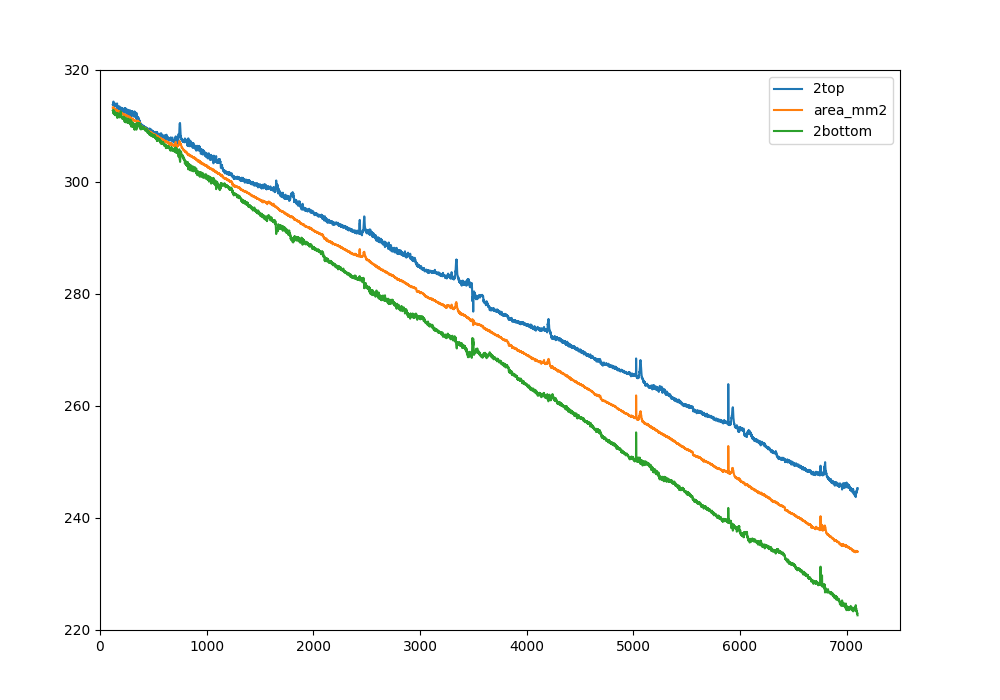

(0, 7500)

In [48]:
fig = plt.figure(figsize = (10,7))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)
ax = fig.add_axes([.1,.1,.8,.8])
df[['2top','area_mm2','2bottom']].iloc[120:-10].plot(ax = ax)
ax.set_ylim([220,320])
ax.set_xlim([0,7500])

<IPython.core.display.Javascript object>


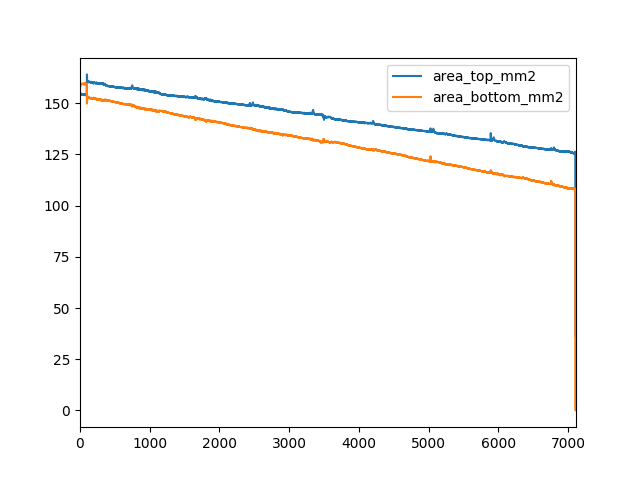

In [29]:
df[['area_top_mm2','area_bottom_mm2']].plot()

In [ ]:
def fit_linear(df, t1, t2):
    df.columns = ['time', 'area']
    df2fit = df.query("timeh >= @t1 and timeh<= @t2")
    z = np.polyfit(df2fit.timeh, df2fit.area_mm2, 1)
    p = np.poly1d(z)
    return p, z

<IPython.core.display.Javascript object>


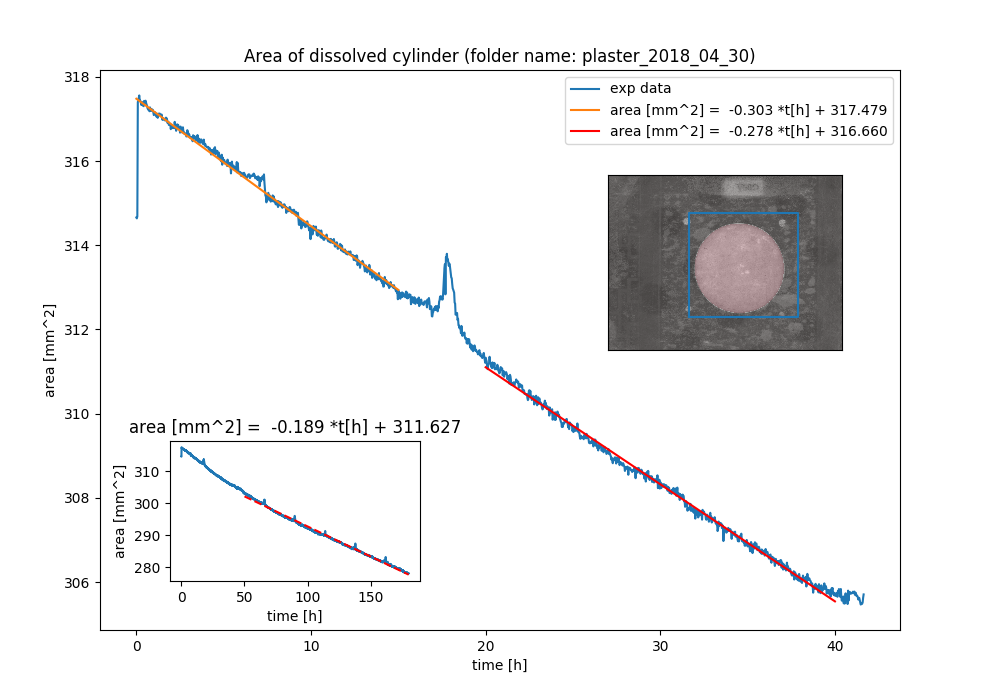

Text(0.5,1,'area [mm^2] =  -0.189 *t[h] + 311.627')

In [99]:
fig2 = plt.figure(figsize = (10,7))
fig2.patch.set_facecolor('white')
fig2.patch.set_alpha(1)

n = 1500
ax2 = fig2.add_axes([.1,.1,.8,.8])
ax2.plot(np.array(df.timeh)[:n], np.array(df.area_mm2)[:n], '-', label = 'exp data')

[th1, th2, th3, th4] = [0, 15, 20, 40]

p1, z1 = fit_linear(df, th1, th2)
p2, z2 = fit_linear(df, th3, th4)

t1 = np.linspace(th1, th2, 100)
t2 = np.linspace(th3, th4, 100)


ax2.plot(t1, p1(t1), label = 'area [mm^2] =  %.3f *t[h] + %.3f' % tuple(z1))
ax2.plot(t2, p2(t2), 'red', label = 'area [mm^2] =  %.3f *t[h] + %.3f' % tuple(z2))

ax2.set_xlabel('time [h]')
ax2.set_ylabel('area [mm^2]')

ax2.set_title(f"Area of dissolved cylinder (folder name: {area_file[:-10]})")
ax2.legend()

ax3 = fig2.add_axes([.5,.5,.45,.25])

ax3.imshow(image2, cmap = 'Reds', alpha = 1)

ax3.imshow(image, cmap = 'gray', alpha = 0.75 )
ax3.plot([left,left,right,right,left],[lower,upper,upper,lower,lower])
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_xticks([])
ax3.set_yticks([])

ax4 = fig2.add_axes([.17,.17,.25,.2])
ax4.set_xlabel('time [h]')
ax4.set_ylabel('area [mm^2]')

[t40, t41] = [50, 180]
df4 = df.sort_values(by = 'timeh')
df4 = df.query("timeh<@t41")
p4, z4 = fit_linear(df4, t40, t41)
t4 = np.linspace(t40, t41, 100)
ax4.plot(np.array(df4.timeh), np.array(df4.area_mm2), '-', label = 'exp data')
ax4.plot(t4, p4(t4), 'red', linestyle = '--')
ax4.set_title('area [mm^2] =  %.3f *t[h] + %.3f' % tuple(z4))

In [100]:
fig2.savefig(os.path.join(notebook_directory, area_file[:-3]+'png'), dpi = 300)